Task: Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall, holidays, and many other factors, build a model to predict the bike count required each hour for a stable supply of rental bikes.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [48]:
df = pd.read_csv('FloridaBikeRentals.csv', encoding = "iso-8859-1")

Expoloratory data analysis

In [49]:
df.head()
df.shape

(8760, 14)

Check for null values in any columns and handle the missing values


In [50]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Convert Date columns to Date format and extract day, month, day of week, and weekdays/weekend from date column


In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [53]:
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekends'] = df['day_of_week'].apply(lambda x: 1 if x =='Saturday' or x == 'Sunday' else 0)
df=df.drop(['Date', 'day_of_week'], axis=1)

Check correlation of features using heatmap


<Axes: >

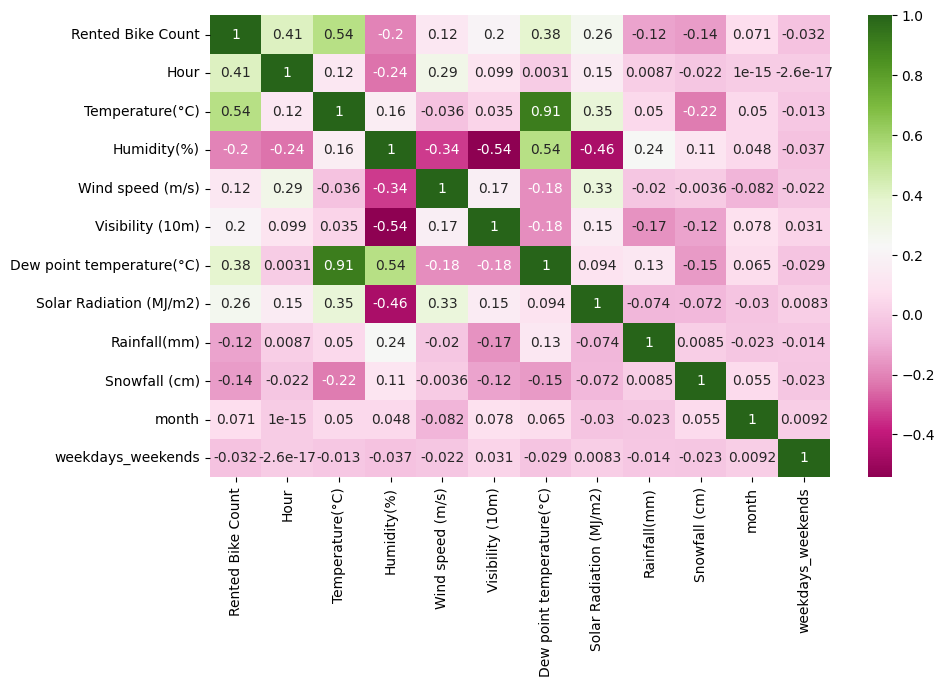

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PiYG')


Plot the distribution plot of Rented Bike Count


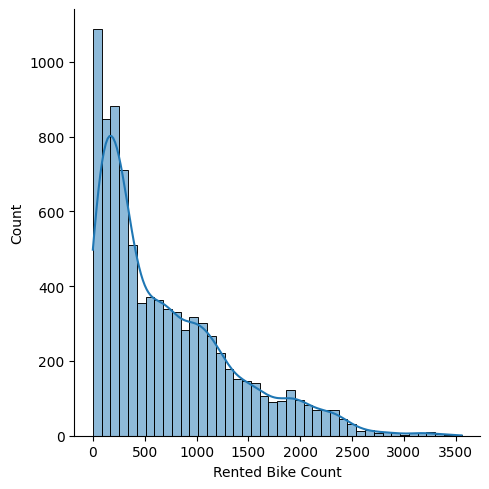

In [55]:
sns.displot(df['Rented Bike Count'], kde=True)

Plot the histogram of all numerical features

In [56]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int32  
 11  weekdays_weekends          8760 non-null   int64  
dtypes: float64(6), int32(1), int64(5)
memory usage: 787.2 KB


In [57]:
numerical_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


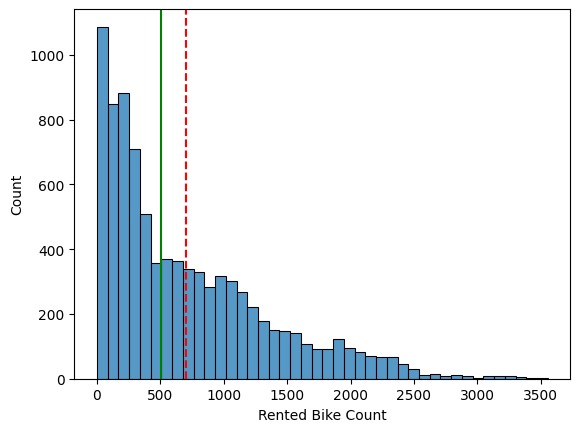

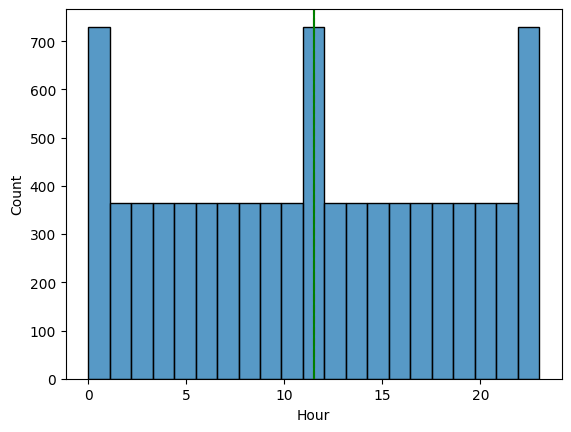

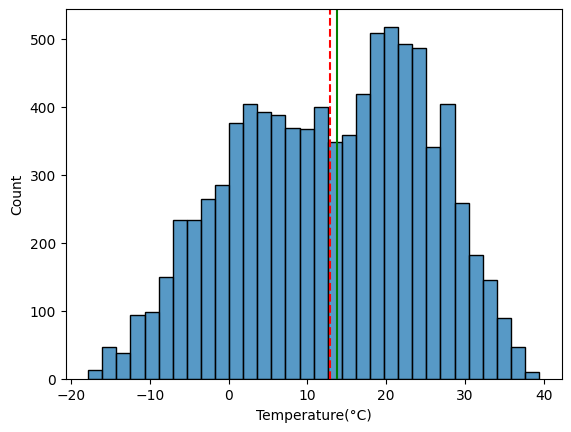

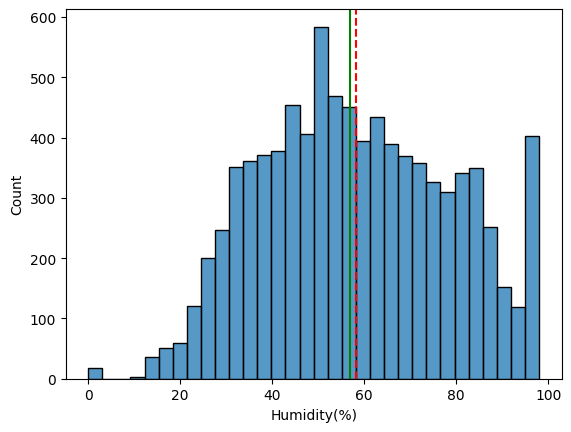

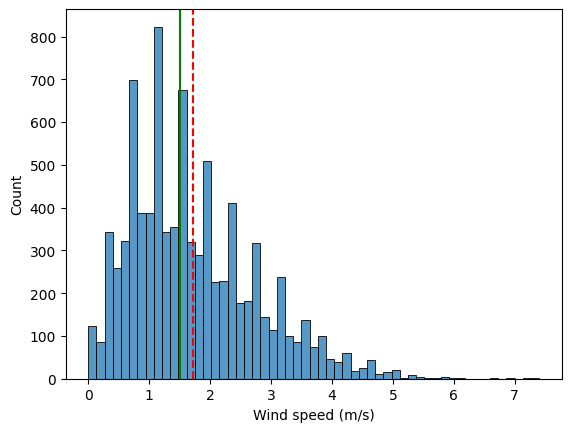

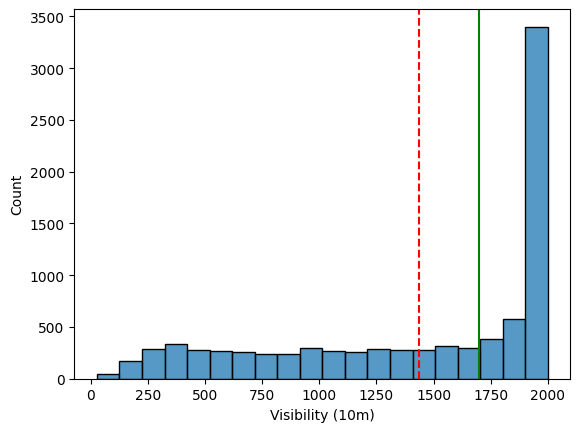

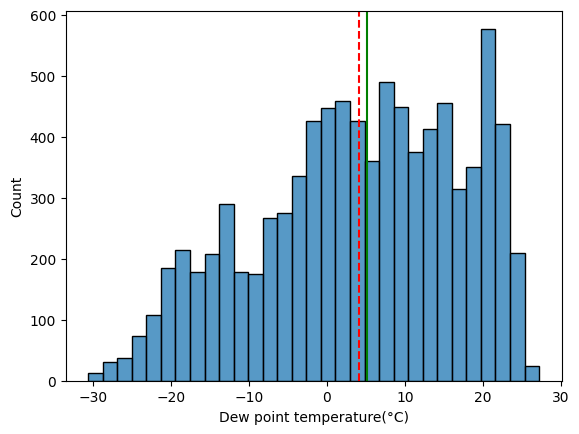

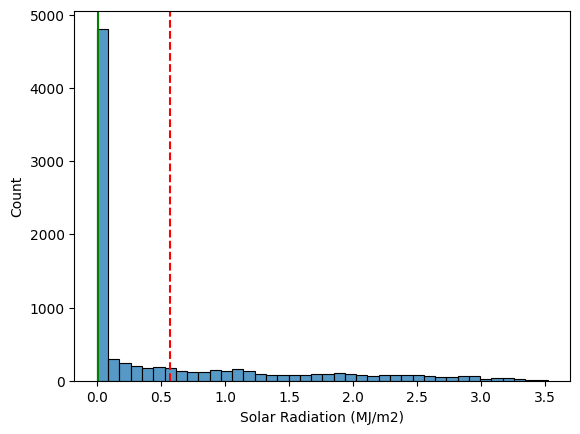

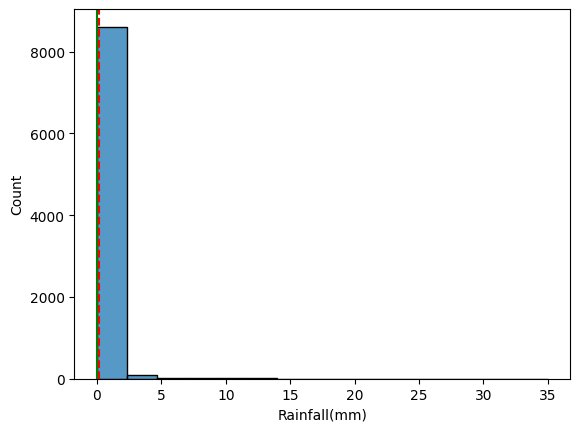

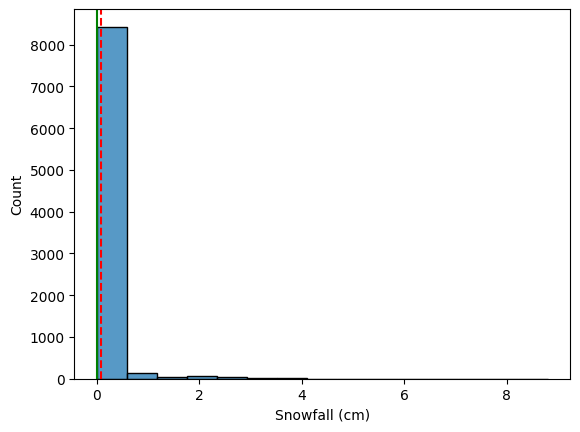

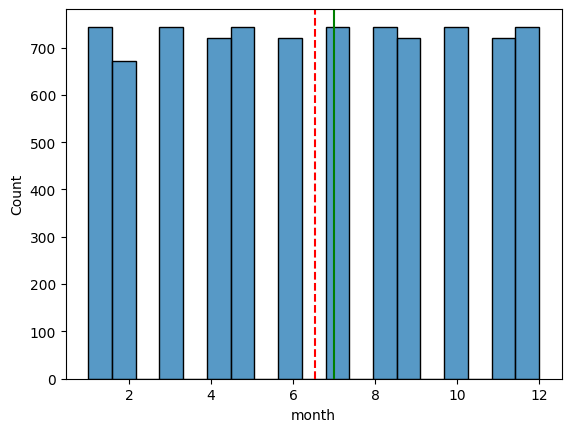

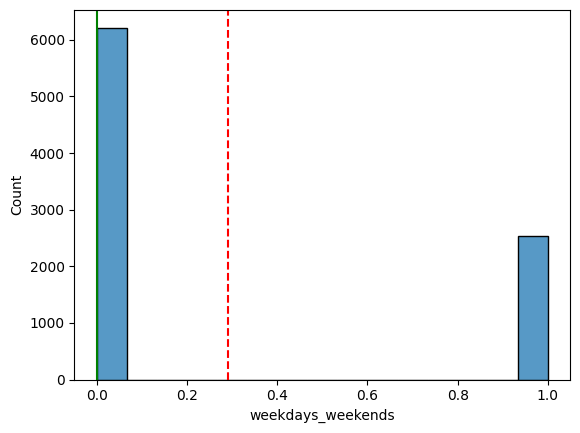

In [58]:
for col in numerical_features.columns:
    sns.histplot(df[col])
    plt.axvline(df[col].mean(), color='r', linestyle='--')
    plt.axvline(df[col].median(), color='g', linestyle='-')
    plt.show()

Observation
    - The histogram plot shows the distribution of each numerical variable across its bins
    - Each graph shows when does their count reach its peak

Plot the box plot of Rented Bike Count against all the categorical features (Hint: Categorical features on X-axis and  Rented Bike Count on Y-axis)

In [59]:
category_features = df.select_dtypes(include='object')
category_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


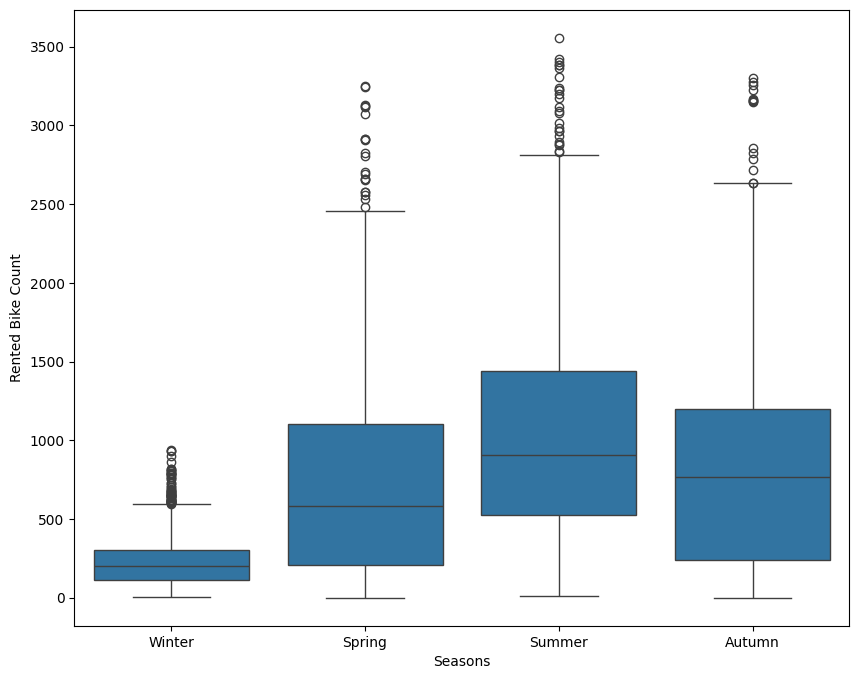

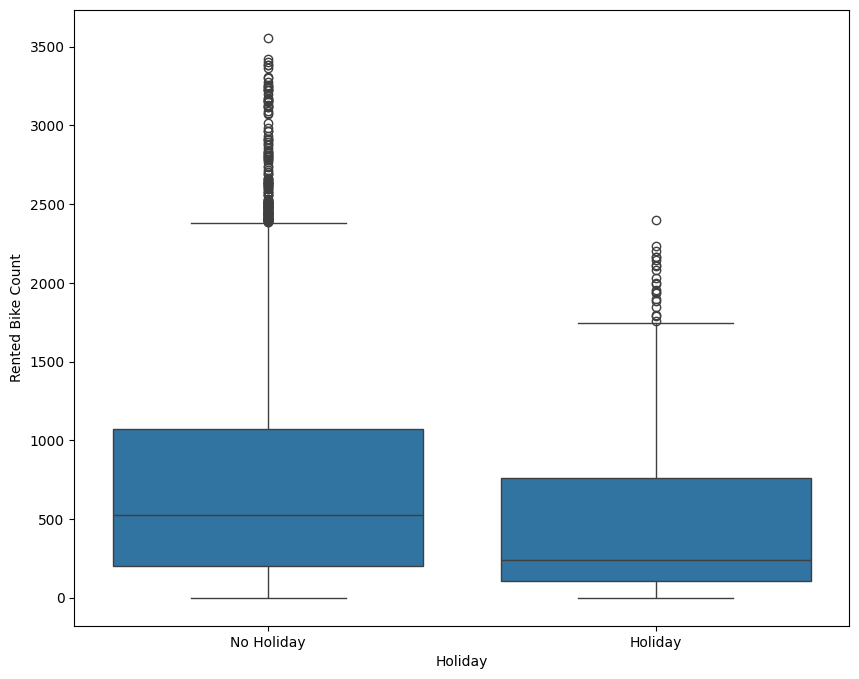

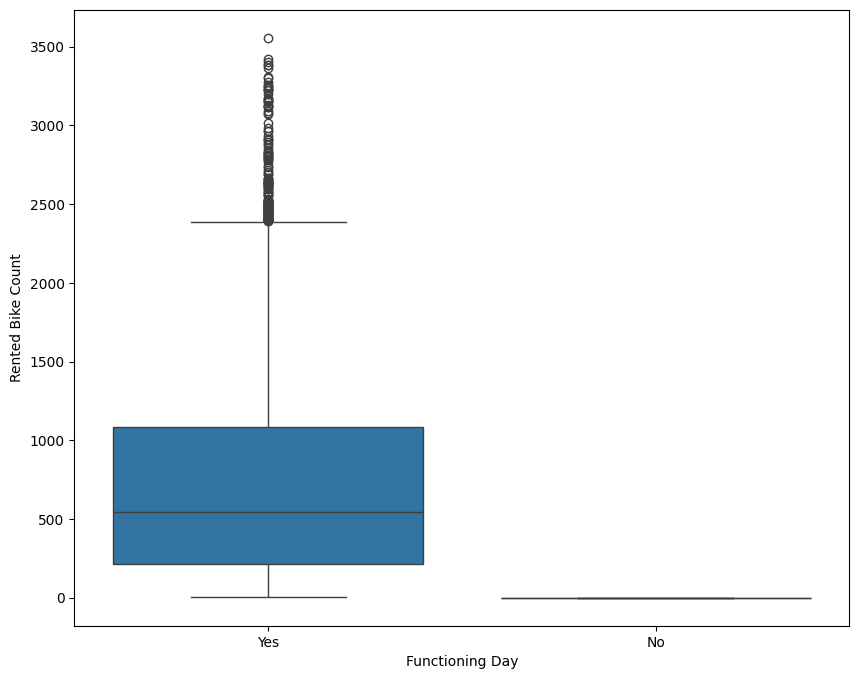

In [60]:
for col in category_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=df[col], y=df['Rented Bike Count'])
    plt.show()

In [61]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

Conclusion
    - Less demand on winter seasons
    - Slightly higher demand during Non-Holidays
    - Almost no demand on non-functioning day

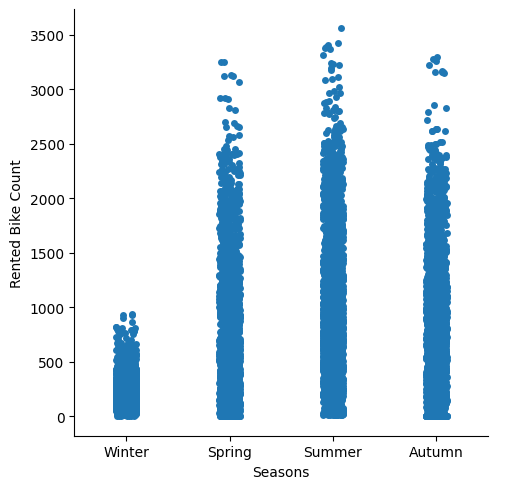

In [62]:
sns.catplot(x='Seasons', y='Rented Bike Count', data=df)

Conclusion
We can clearly see that there is less demand of rented bike during winter season


Plot the Seaborn catplot of Rented Bike Count against features like Hour, Holiday, Rainfall (mm), Snowfall (cm), weekdays, weekend, and give your inferences.


<Figure size 2000x1600 with 0 Axes>

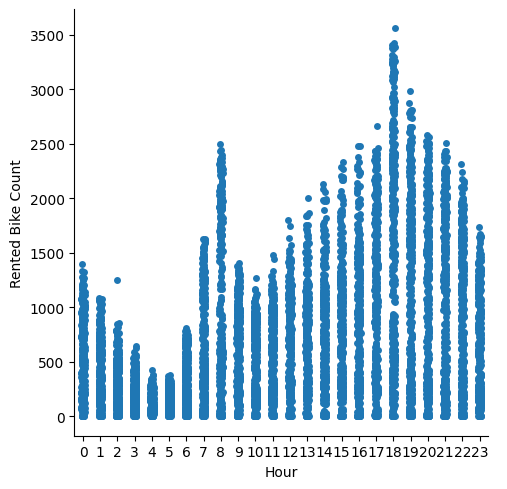

<Figure size 2000x1600 with 0 Axes>

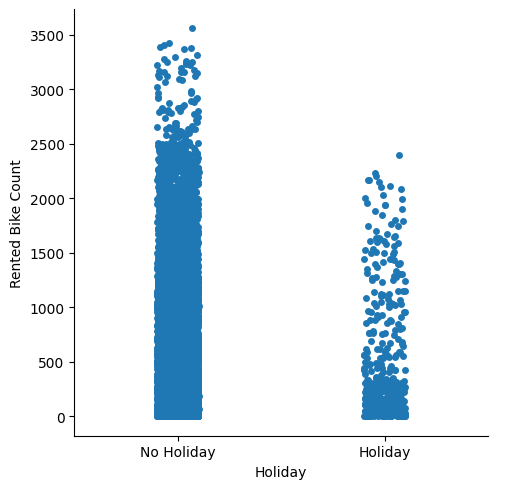

<Figure size 2000x1600 with 0 Axes>

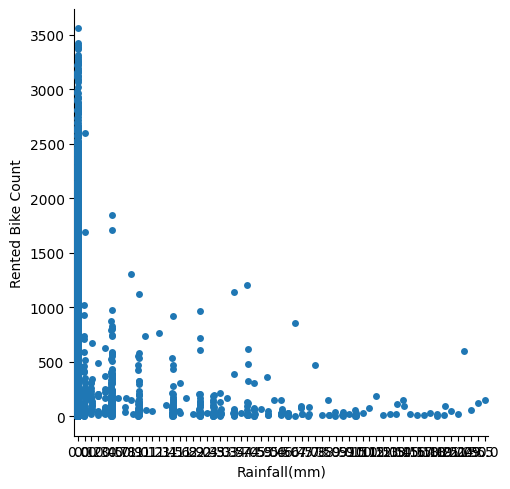

<Figure size 2000x1600 with 0 Axes>

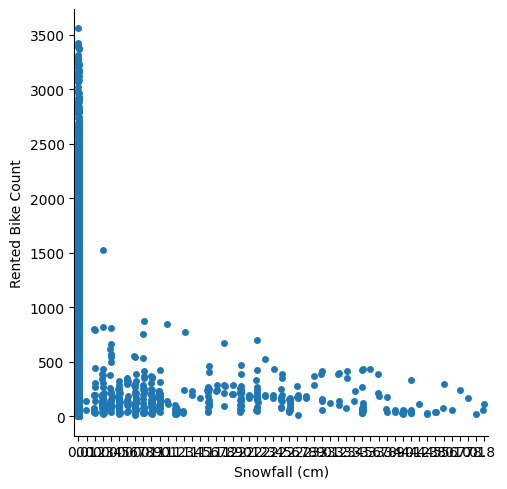

<Figure size 2000x1600 with 0 Axes>

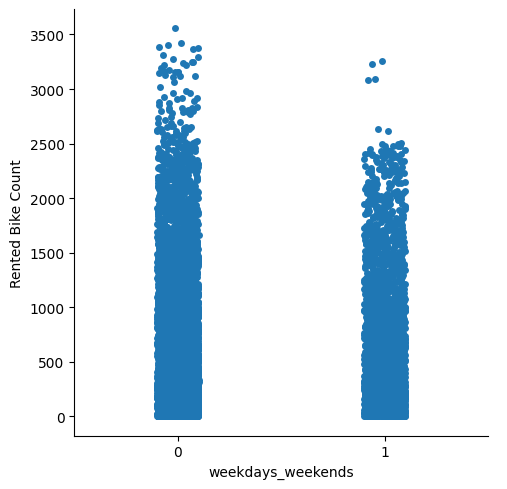

In [63]:
feature_list=['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'weekdays_weekends']
for feature in feature_list:
    plt.figure(figsize=(10,8), dpi=200)
    sns.catplot(x=feature, y='Rented Bike Count', data=df)
    plt.show()

Conclusion
From hour vs rented bike
- we can clearly see there is high demand of Rented bike between the office hours
From working-nonworking vs rented bike
- As cleared from 2nd plot working days has comparatively high demand of renred bike as comparted to non-working day
From Rainfall vs rented bike
- we can see that if Rainfall increase demand of Rented Bike decreases
From Snowfall vs rented bike
- we can see that if snow fall increase demand of Rented Bike descreases

Encode the categorical features into numerical features. (Hint: use get_dummies())


In [64]:
dummy_categorical_feature = pd.get_dummies(category_features, drop_first=True)


In [65]:
dummy_categorical_feature.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True


In [66]:
final_df = pd.concat([dummy_categorical_feature, numerical_features], axis=1)

In [67]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekends
0,False,False,True,True,True,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,False,False,True,True,True,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,False,False,True,True,True,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,False,False,True,True,True,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,False,False,True,True,True,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [68]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Identify the target variable and split the dataset into train and test with a ratio of 80:20 and random state 1


In [69]:
X = final_df.drop('Rented Bike Count', axis=1)

In [70]:
X.shape

(8760, 16)

In [71]:
y=final_df['Rented Bike Count']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Perform Standard Scaling of the train dataset.


In [73]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

Perform Linear Regression, Lasso Regression, and Ridge Regression to predict the bike count required each hour and compare the results.

Functions to train linear models and calculate scores

In [74]:
mean_sq_error = []
root_mean_squared_error = []
r2_list = [] 
adj_r2_list = []

In [75]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Get metricts
    preds = model.predict(X_test)
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    print('\nEvaluation Matrix\n')
    MSE = mean_squared_error(y_test, preds)
    print('MSE:', MSE)
    RMSE = np.sqrt(MSE)
    print('RMSE:', RMSE)
    r2 = r2_score(y_test, preds)
    #r2 = model.score(X_test, y_test)
    print('R2:', r2)
    adj_r2 = 1 - (1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    print('Adjusted R2:', adj_r2)

    train_class_preds = model.predict(X_train)

    print('\nEvoluton Matrix\n')
    mean_sq_error.append(MSE)
    root_mean_squared_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2) 

    # ploting the graph
    print('\nEvaluation Graph\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(['ACTUAL','PREDICTED'],prop={'size':20})
    plt.show()

Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression


Evaluation Matrix

MSE: 187707.21583612266
RMSE: 433.25190805825963
R2: 0.5458226629120393
Adjusted R2: 0.5416342840109399

Evoluton Matrix


Evaluation Graph



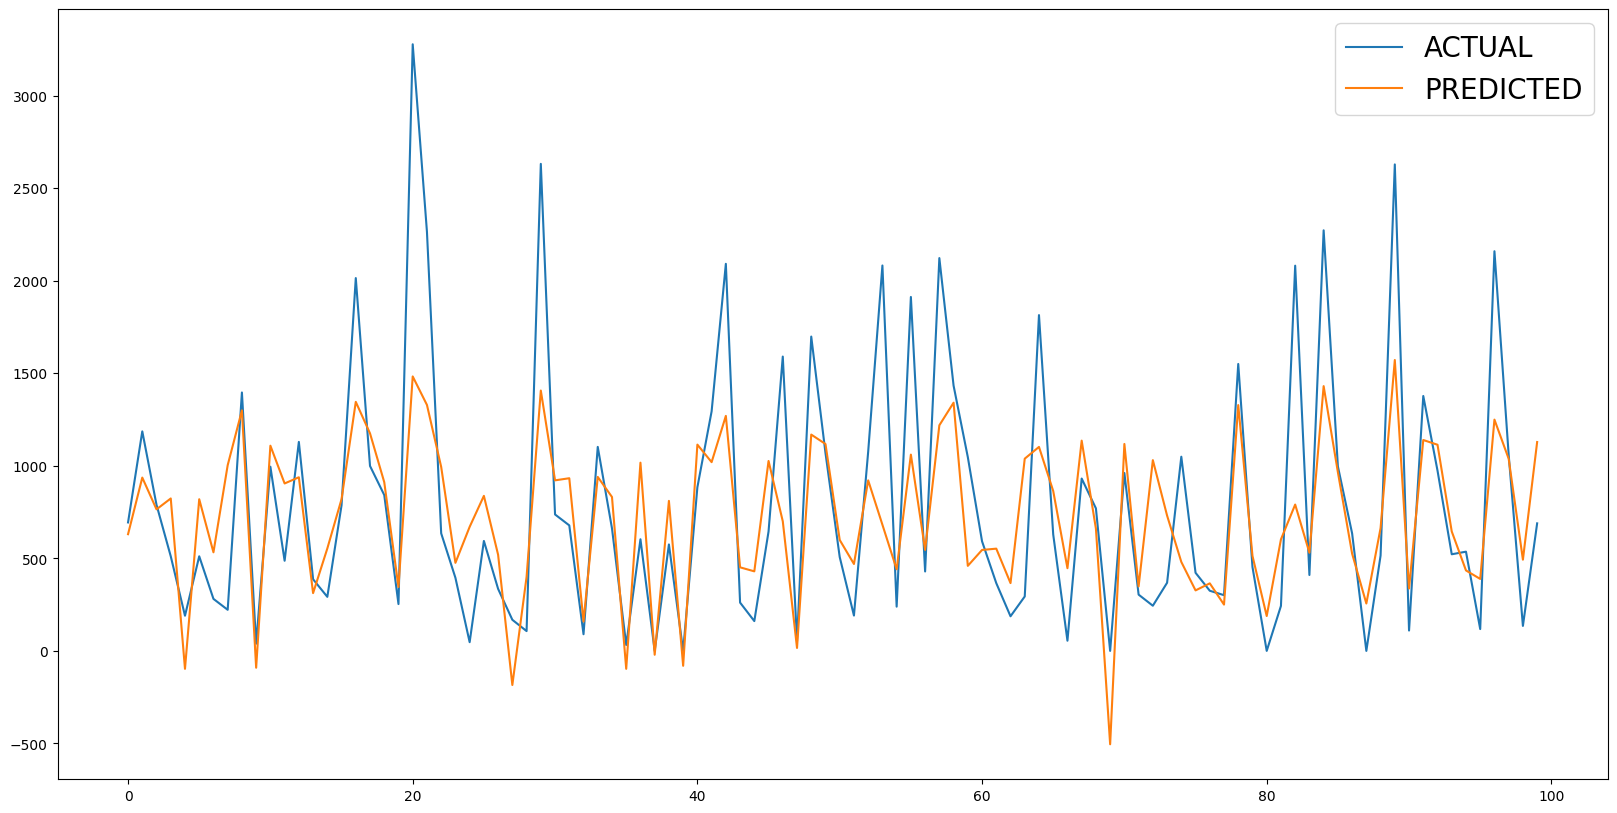

In [77]:
linear_model=LinearRegression()
run_model(linear_model, X_train, y_train, X_test, y_test)

Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso(alpha=0.1)
# setting the grid parameters of lasso model
# parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 0.0014]}
# lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)



Evaluation Matrix

MSE: 187671.11316362943
RMSE: 433.2102412958741
R2: 0.5459100171225937
Adjusted R2: 0.5417224437934649

Evoluton Matrix


Evaluation Graph



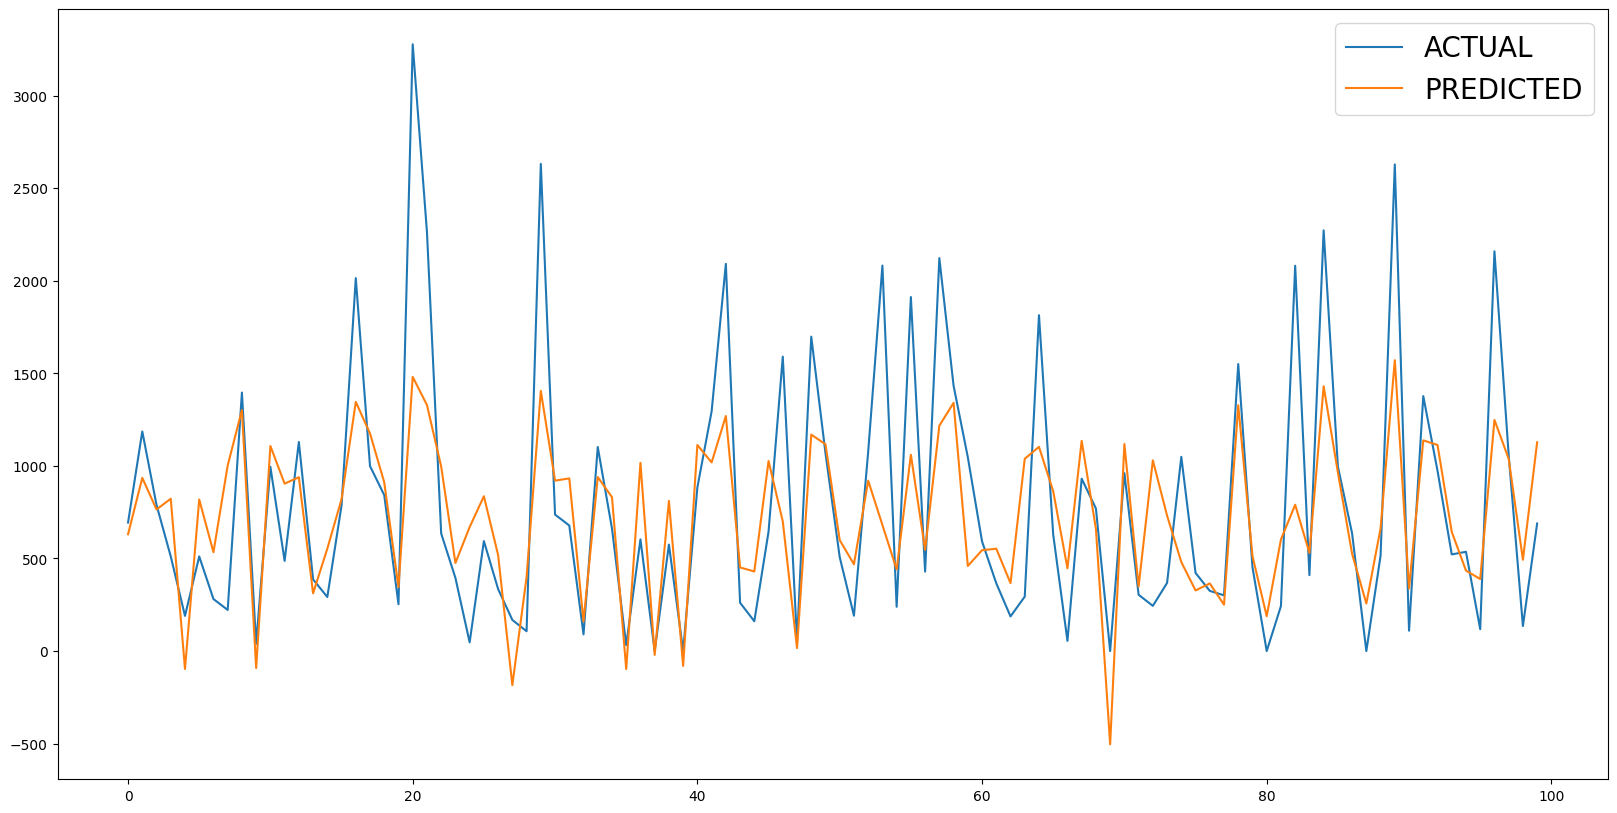

In [79]:
run_model(lasso_model, X_train, y_train, X_test, y_test)

In [80]:
# run_model(lasso_grid, X_train, y_train, X_test, y_test)

Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)

# finding the best parameters for ridge model by grid search
# parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 0.5, 1.5,1.6,1.7,1.8,1.9]}
# ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)



Evaluation Matrix

MSE: 187633.8910058622
RMSE: 433.1672783185062
R2: 0.5460000800454285
Adjusted R2: 0.5418133372677495

Evoluton Matrix


Evaluation Graph



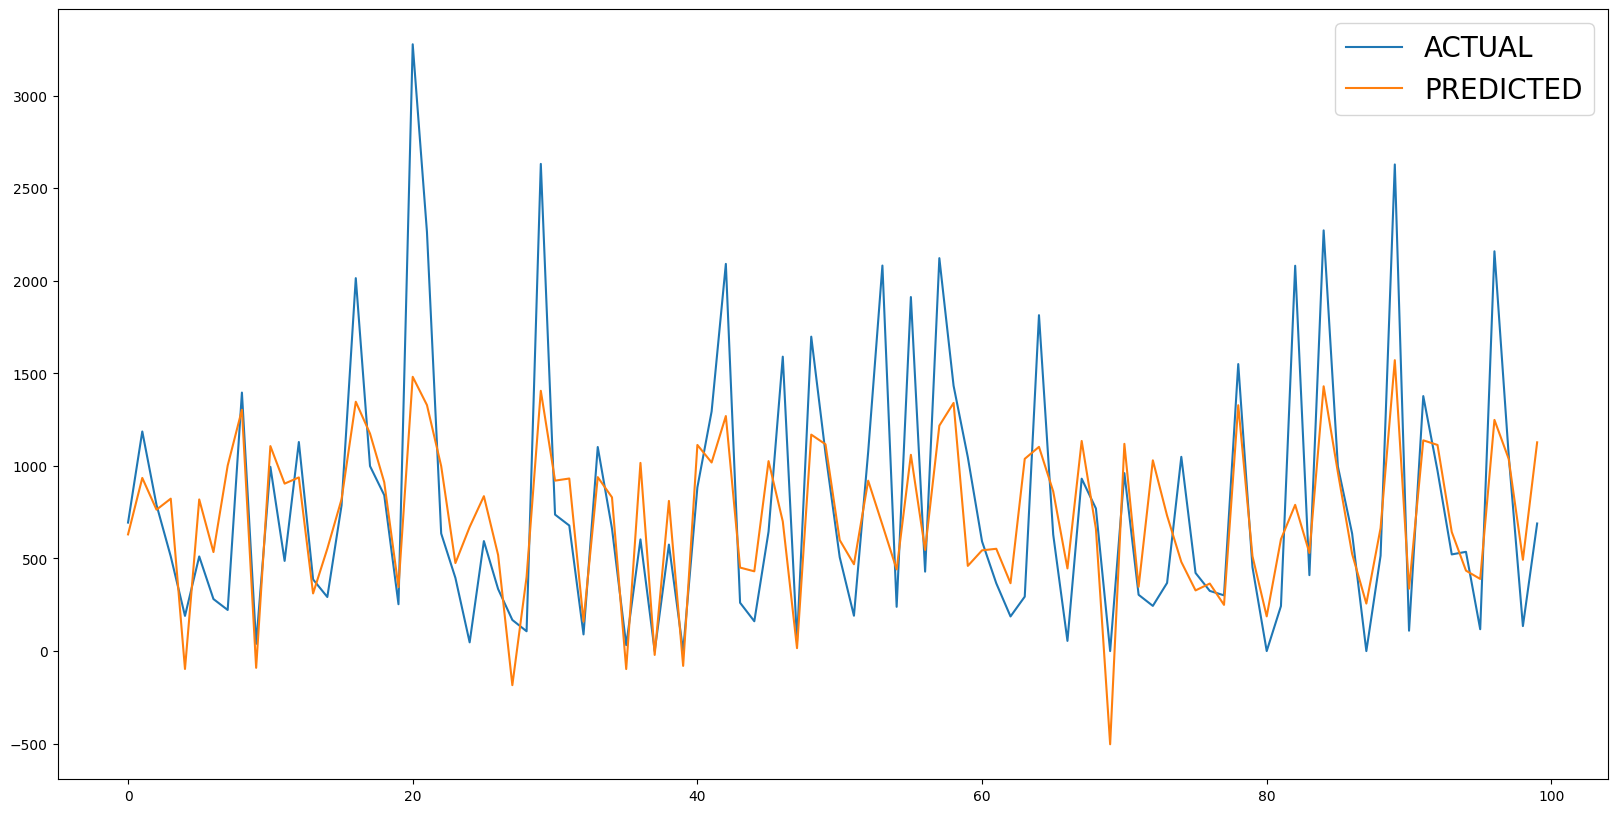

In [82]:
run_model(ridge, X_train, y_train, X_test, y_test)

Combined Evaluation matrix

In [83]:
all_model_matrices ={'mean_squared_error': mean_sq_error, 'root_mean_squared_error': root_mean_squared_error, 'r2_list': r2_list, 'Adjusted_R2': adj_r2_list}


In [84]:
model_name = ['Linear', 'Lasso', 'Ridge']

In [85]:
matrices_df = pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [86]:
matrices_df

,Linear,Lasso,Ridge
mean_squared_error,187707.215836,187671.113164,187633.891006
root_mean_squared_error,433.251908,433.210241,433.167278
r2_list,0.545823,0.545910,0.546000
Adjusted_R2,0.541634,0.541722,0.541813


In [87]:
final_matrices = matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [88]:
final_matrices

,Models,mean_squared_error,root_mean_squared_error,r2_list,Adjusted_R2
0,Linear,187707.215836,433.251908,0.545823,0.541634
1,Lasso,187671.113164,433.210241,0.545910,0.541722
2,Ridge,187633.891006,433.167278,0.546000,0.541813


([0, 1, 2], [Text(0, 0, 'Linear'), Text(1, 0, 'Lasso'), Text(2, 0, 'Ridge')])

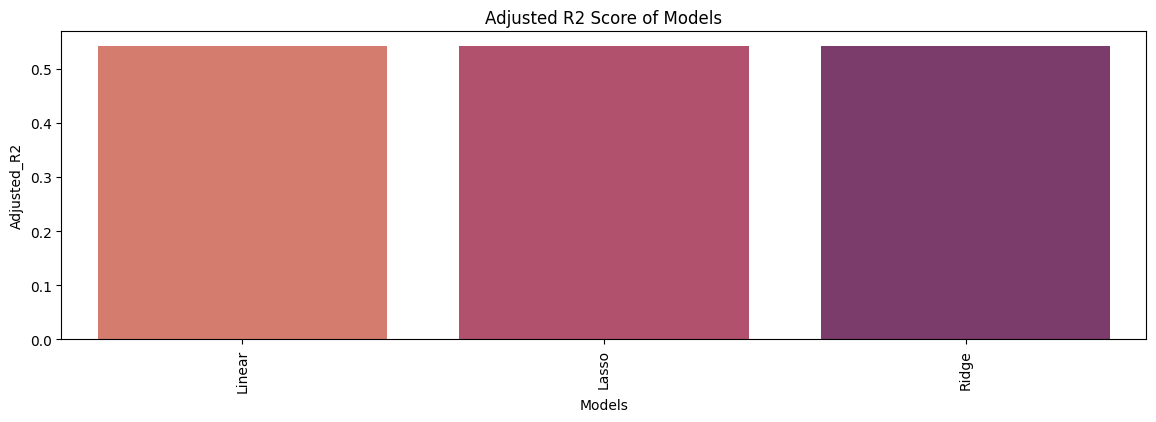

In [89]:
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette='flare').set(title='Adjusted R2 Score of Models')
plt.xticks(rotation=90)

# Final Conclusions
1. In holiday or non-working days there is demands in rented bikes
2. There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM
3. People preferred more rented bikes in the morning than the evening
4. When the rainfall was less, people have booked more bikes except some few cases
5. The temperature, hour, and humidity are the most important features that positively drive the total rented bikes count
6. After performing the various models the Lasso and Ridge found to be the slightly better model that can be used for the bike sharing demand prediction since the performance metrics (MSE, RMSE) shows lower and (R2, adjusted_R2) shows a higher value for the Lasso and Ridge models!
7. We can use either Lasso or Ridge model for the bike rental stations